In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.shape

(150, 4)

In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
iris_df.duplicated().sum()

1

In [10]:
iris_df = iris_df.drop_duplicates()

Detecting the outliers

<Axes: ylabel='Count'>

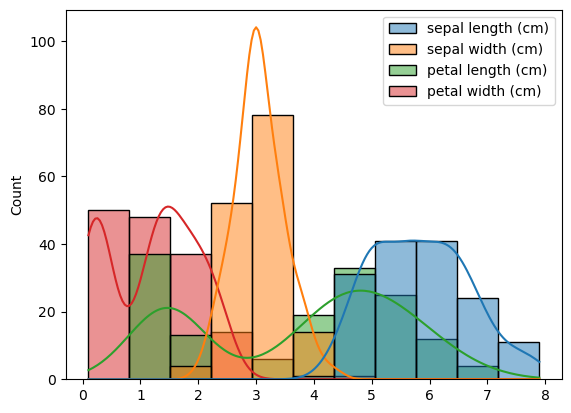

In [17]:
sns.histplot(data = iris_df,kde = True)

<Axes: xlabel='sepal width (cm)'>

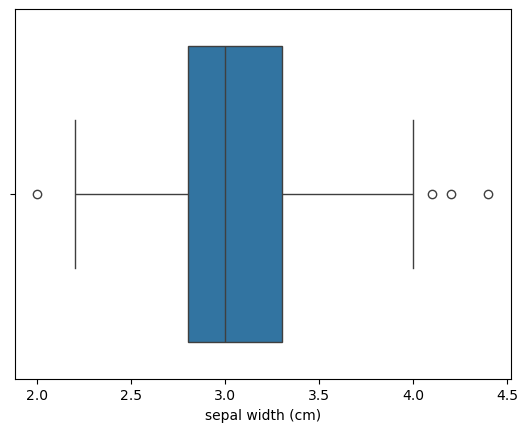

In [21]:
sns.boxplot(x = iris_df['sepal width (cm)'])

In [26]:
print("\nSkewness:\n", iris_df.skew())
print("\nKurtosis:\n", iris_df.kurtosis())


Skewness:
 sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

Kurtosis:
 sepal length (cm)   -0.569006
sepal width (cm)     0.226236
petal length (cm)   -1.408270
petal width (cm)    -1.339953
dtype: float64


## Clustering Algorithm

In [29]:
X = iris_df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


# Kmeans Clustering
  ### Kmeans is an iterable unsupervised algorithm which classifies data based on clusters

## Why Kmeans is suitable for this dataset

    Clear Clusters: The Iris dataset contains measurements (sepal and petal dimensions) that are naturally grouped into three species, which makes it a 
      good candidate for clustering.

      
    Dimensionality: The dataset has low dimensionality (4 features), which aligns well with KMeans, as it works efficiently in lower dimensions.

    
    Interpretability: KMeans provides an easy way to group similar observations and compare the results against the known species labels (though 
      clustering does not use labels).

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [37]:
X_scaled['Cluster'] = clusters

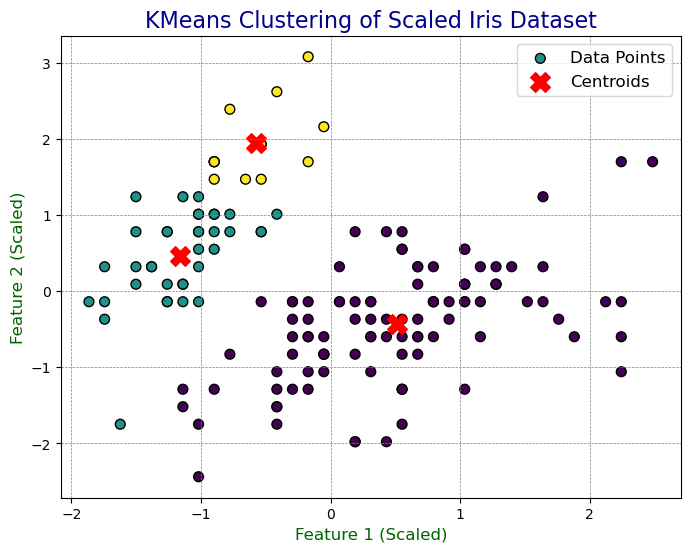

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=clusters, cmap='viridis', s=50,edgecolor='k',label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X',label='Centroids')
plt.title("KMeans Clustering of Scaled Iris Dataset", fontsize=16, color='darkblue')
plt.xlabel("Feature 1 (Scaled)", fontsize=12, color='darkgreen')
plt.ylabel("Feature 2 (Scaled)", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right')
plt.show()

## Elbow Method

The Elbow Method helps to determine the optimal number of clusters by plotting inertia for different values of 𝑘 and identifying the "elbow" point, where inertia starts to decrease more slowly.

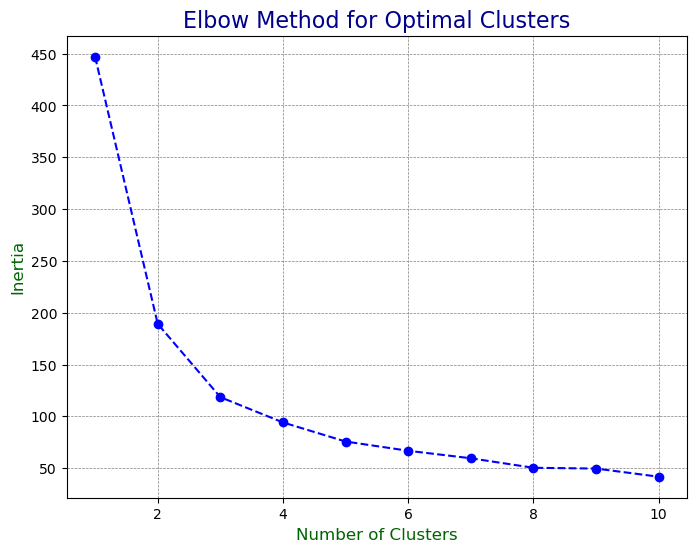

In [39]:
inertia = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled.iloc[:, :-2])  
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal Clusters", fontsize=16, color='darkblue')
plt.xlabel("Number of Clusters", fontsize=12, color='darkgreen')
plt.ylabel("Inertia", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

## Hierarchial Clustering

Hierarchical Clustering builds a hierarchy of clusters either in a bottom-up (Agglomerative) or top-down (Divisive) approach.

Agglomerative Clustering starts with each data point as its own cluster and progressively merges the closest clusters.

Hierarchical Clustering is particularly useful for small datasets like Iris.
    
The dendrogram allows us to visualize the merging process and decide on the number of clusters based on a threshold distance.

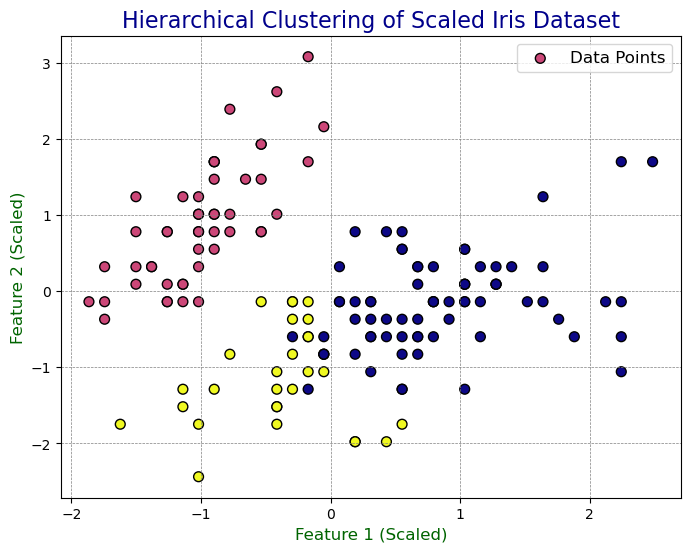

In [40]:
hrl = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_h = hrl.fit_predict(X_scaled.iloc[:, :-1])
X_scaled['Cluster_H'] = clusters_h
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=clusters_h, cmap='plasma', s=50, edgecolor='k',label='Data Points')
plt.title("Hierarchical Clustering of Scaled Iris Dataset", fontsize=16, color='darkblue')
plt.xlabel("Feature 1 (Scaled)", fontsize=12, color='darkgreen')
plt.ylabel("Feature 2 (Scaled)", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right')
plt.show()

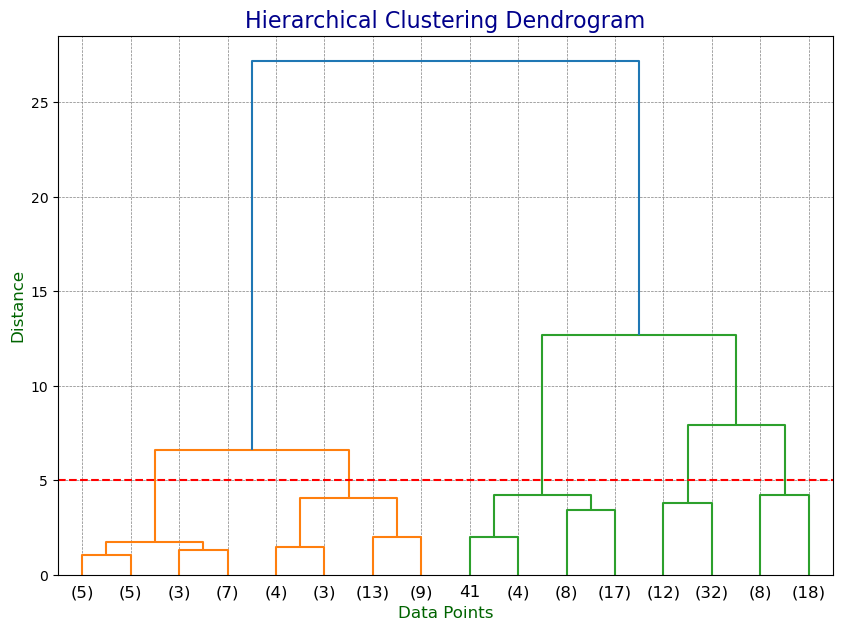

In [43]:
linkage_matrix = linkage(X_scaled.iloc[:, :-2], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3, color_threshold=0.7 * max(linkage_matrix[:, 2]))
plt.axhline(y=5, color='red', linestyle='--', label='Threshold Line')
plt.title("Hierarchical Clustering Dendrogram", fontsize=16, color='darkblue')
plt.xlabel("Data Points", fontsize=12, color='darkgreen')
plt.ylabel("Distance", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

## end note

Loaded and Preprocessed the Iris dataset, including missing value checks, duplicates removal, outlier detection, skewness and kurtosis evaluation, and scaling the features.
Applied KMeans Clustering, visualized the results, and used the Elbow Method to find the optimal number of clusters.
Implemented Hierarchical Clustering (Agglomerative Clustering) and visualized the results using a dendrogram with a threshold line for better clarity.
Both clustering techniques showed good results for this well-separated dataset. While KMeans works well for defining distinct clusters, Hierarchical Clustering provides a more detailed view of how clusters are formed at each distance level.